In [30]:
N = 1000
totient = [0] * (N+1)
sigma = [0] * (N+1)

with open("data.csv") as h:
    for line in h.read().split("\n"):
        a, b, c = map(int, line.split(" "))
        totient[a] = b
        sigma[a] = c
        if a == N: break

In [31]:
import math
c = 6 / math.pi**2
rtc = 6**0.5 / math.pi

import numpy as np
import matplotlib.pyplot as plt

prod = np.array([totient[i]*sigma[i] for i in range(N+1)])
lb = np.array([i**2*c for i in range(N+1)])
ub = np.array([i**2 for i in range(N+1)])

plt.figure(figsize=(10, 8), dpi=300)

#plt.plot(lb, color='tab:orange')
#plt.plot(ub, color='tab:orange')
plt.plot(prod, ',', color='tab:blue')
plt.show()


In [32]:
from collections import Counter

pfactorize = [Counter() for _ in range(N + 1)]

def init_pfactorize():
    for i in range(2, N + 1):
        if pfactorize[i]:
            continue
        
        pow_i = i
        while pow_i <= N:
            for j in range(pow_i, N + 1, pow_i):
                pfactorize[j][i] += 1
            if pow_i > N // i:
                break
            pow_i *= i

init_pfactorize()

In [ ]:
def ok(n, fl):
    return 1 if sorted(dict(pfactorize[n]).values())==fl else 0

def ok2(n, p):
    return len(list(pfactorize[n])) == 2 and pfactorize[n][p]==1

True

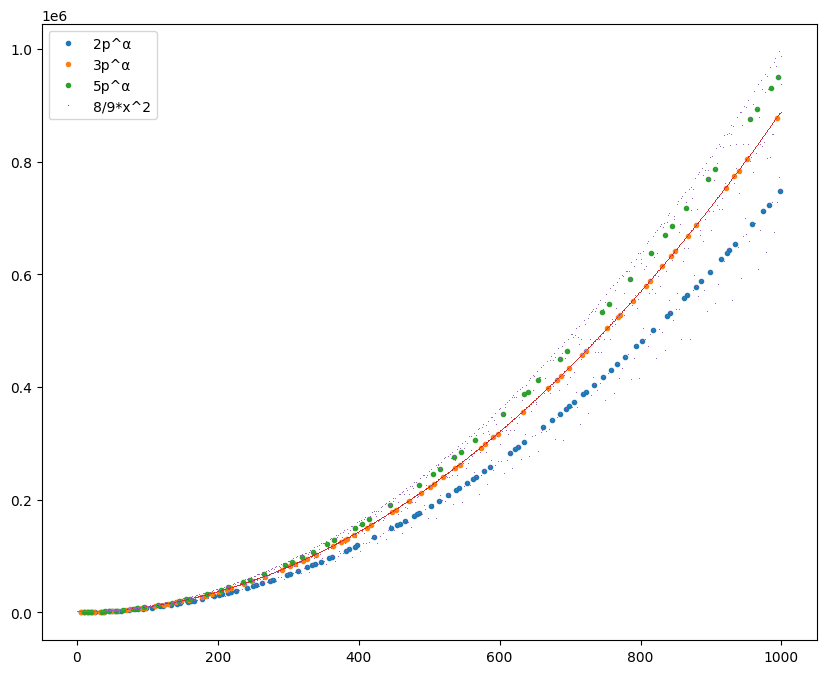

In [61]:
prod = np.array([totient[i]*sigma[i] for i in range(N+1)])


x2 = np.array([i for i in range(N+1) if ok2(i, 2)])
y2 = prod[x2]

x3 = np.array([i for i in range(N+1) if ok2(i, 3)])
y3 = prod[x3]

x5 = np.array([i for i in range(N+1) if ok2(i, 5)])
y5 = prod[x5]

xtest = np.arange(1, N, 1)
ytest = 8/9*xtest ** 2

plt.figure(figsize=(10, 8), dpi=100)

plt.plot(x2, y2, '.', label='2p^α')
plt.plot(x3, y3, '.', label='3p^α')
plt.plot(x5, y5, '.', label='5p^α')

#THE POINTS AP^alpha WHERE A IS CONSTANT PRODUCES THE CURVE PHI(A)SIGMA(A)/A^2 X^2

plt.plot(xtest, ytest, ',', label='8/9*x^2')

plt.plot(prod, ',')

plt.legend()
plt.show()


In [35]:
totient[2*499]*sigma[2*499]

747000

rtprod = np.array([(totient[i]*sigma[i])**0.5 for i in range(N+1)])
rtlb = np.array([i*rtc for i in range(N+1)])
rtub = np.array([i for i in range(N+1)])

plt.figure(figsize=(12, 8))


plt.plot(rtlb)
plt.plot(rtub)
plt.plot(rtprod, ',')
plt.show()